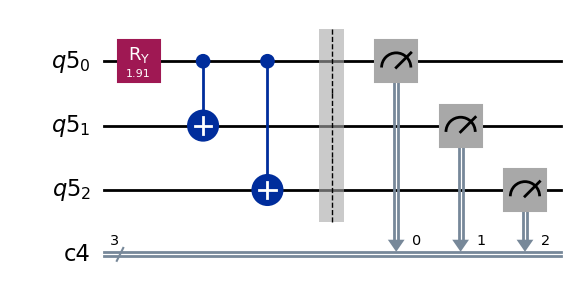

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q, c)

# initialize the first qubit to (1/sqrt(3))|0> + (2/sqrt(3))|1>
theta = 2 * np.arccos(1 / np.sqrt(3))
qc.ry(theta, q[0])

qc.cx(q[0], q[1])
qc.cx(q[0], q[2])

qc.barrier()

qc.measure(q, c)

qc.draw(output="mpl")

In [12]:
from qiskit_aer import AerSimulator

# execute the circuit and read the results
job = AerSimulator().run(qc, shots=1024)

counts = job.result().get_counts(qc)
for outcome in counts.keys():
    print(outcome, "is observed", counts[outcome], "times")

000 is observed 339 times
111 is observed 685 times


In [13]:
from qiskit_aer import StatevectorSimulator

job = StatevectorSimulator().run(qc, optimization_level=0, shots=1)
current_quantum_state = job.result().get_statevector(qc).data
print(current_quantum_state)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


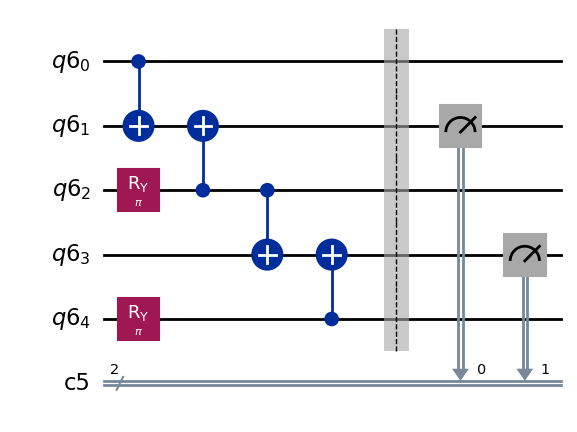

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

q = QuantumRegister(5)
c = ClassicalRegister(2)

qc = QuantumCircuit(q, c)

# current state 110
# qc.ry(2 * np.arccos(0), q[0])
qc.ry(2 * np.arccos(0), q[2])
qc.ry(2 * np.arccos(0), q[4])

qc.cx(q[0], q[1])
qc.cx(q[2], q[1])
qc.cx(q[2], q[3])
qc.cx(q[4], q[3])

qc.barrier()
qc.measure([q[1], q[3]], c)
qc.draw(output="mpl")

In [15]:
from qiskit_aer import AerSimulator

# execute the circuit and read the results
job = AerSimulator().run(qc, shots=1024)

counts = job.result().get_counts(qc)
for outcome in counts.keys():
    print(outcome, "is observed", counts[outcome], "times")

01 is observed 1024 times


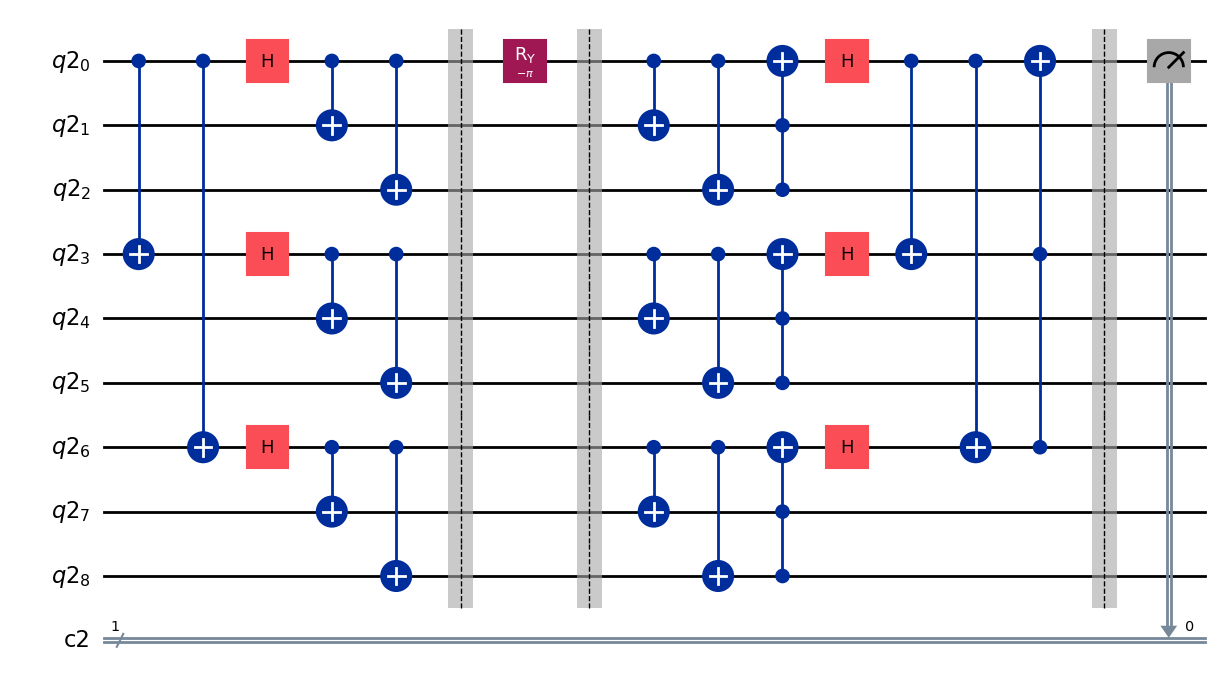

In [4]:
# 9-bit shor's code
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

q = QuantumRegister(9)
c = ClassicalRegister(1)

qc = QuantumCircuit(q, c)

# create a copying circuit
# qc.ry(2 * np.arccos(0), q[0])
qc.cx(q[0], q[3])
qc.cx(q[0], q[6])

# create a shor's code circuit
qc.h(q[0])
qc.h(q[3])
qc.h(q[6])

qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
qc.cx(q[3], q[4])
qc.cx(q[3], q[5])
qc.cx(q[6], q[7])
qc.cx(q[6], q[8])

qc.barrier()

# apply the error iY to the first qubit
qc.ry(-np.pi, q[0])

qc.barrier()

# error correction
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])
qc.cx(q[3], q[4])
qc.cx(q[3], q[5])
qc.cx(q[6], q[7])
qc.cx(q[6], q[8])

qc.ccx(q[2], q[1], q[0])
qc.ccx(q[5], q[4], q[3])
qc.ccx(q[8], q[7], q[6])

qc.h(q[0])
qc.h(q[3])
qc.h(q[6])

qc.cx(q[0], q[3])
qc.cx(q[0], q[6])
qc.ccx(q[6], q[3], q[0])

qc.barrier()

qc.measure([q[0]], c)
qc.draw(output="mpl")


In [5]:
from qiskit_aer import AerSimulator

# execute the circuit and read the results
job = AerSimulator().run(qc, shots=1024)

counts = job.result().get_counts(qc)
for outcome in counts.keys():
    print(outcome, "is observed", counts[outcome], "times")

0 is observed 1024 times
